# Set 3 Compartmental & Spatial models
Sander Broos and Nick van Santen

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.signal import find_peaks

In [2]:
# Run cell to increase font sizes. Useful when saving plots
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,6)

Question 1: Complex calcium oscillations

In [3]:
# Declare parameters

# Total concentrations (micro Moles)
Ca_tot =  90 
Pr_tot = 120

# Geometric Parameters

rho_ER = 0.01
rho_m = 0.01
beta_ER = 0.0025
beta_m = 0.0025

# Kinetics parameters

k_pump = 20         #s^-1
k_ch = 3900         #s^-1
k_leak = 0.05       #s^-1
k_in = 300          #(micro Moles s^-1)
k_out = 125         #s^-1
k_m = 0.00625       #s^-1
k_plus = 0.1        #(micro Moles)
k_minus = 0.01      #s^-1
K1 = 5              #(micro Moles)
K2 = 0.8            #(micro Moles)
K3 = 5              #(micro Moles)

# Initial concentrations (micro Moles)

Ca_cyt_0 = 0.3 
Ca_ER_0 = 0.2 
Ca_m_0 = 1 

In [4]:
def Ca_system(y, t):
    Ca_cyt, Ca_ER, Ca_m = y
    J_pump = k_pump*Ca_cyt
    J_ch = k_ch*((Ca_cyt**2)/(K1**2 + Ca_cyt**2))*(Ca_ER - Ca_cyt)
    J_leak = k_leak*(Ca_ER - Ca_cyt)
    J_in = k_in*(Ca_cyt**8)/(K2**8 + Ca_cyt**8)
    J_out = Ca_m*(((k_out*Ca_cyt**2) / (K3**2 + Ca_cyt**2))+k_m)
    CaPr = Ca_tot - Ca_cyt -(rho_ER/beta_ER)*Ca_ER - (rho_m/beta_m)*Ca_m
    Pr = Pr_tot - CaPr
    
    return [J_ch + J_leak - J_pump + J_out - J_in + k_minus*CaPr - k_plus*Ca_cyt*Pr, 
           (beta_ER/rho_ER)*(J_pump - J_ch - J_leak), (beta_m/rho_m)*(J_in - J_out)]

In [5]:
def evolve(y0, ts):
    return odeint(Ca_system, y0, ts)

def plot_Ca_system(Ca_results, ts):

    plt.plot(ts, Ca_results[:, 0], label=r"$[Ca_{cyt}]$")
    plt.plot(ts, Ca_results[:, 1], label=r"$[Ca_{ER}]$")
    plt.plot(ts, Ca_results[:, 2], label=r"$[Ca_m]$")

    plt.xlabel("t [s]")
    plt.ylabel(r"Concentration [$\mu$M]")

    plt.legend()
    plt.show()

def plot_2D_phase_plots(Ca_results):

    plt.subplot(1,3,1)
    plt.plot(Ca_results[:, 0], Ca_results[:, 1])
    plt.xlabel(r"$[Ca_{cyt}]$")
    plt.ylabel(r"$[Ca_{ER}]$")

    plt.subplot(1,3,2)
    plt.plot(Ca_results[:, 1], Ca_results[:, 2])
    plt.xlabel(r"$[Ca_{ER}]$")
    plt.ylabel(r"$[Ca_m]$")

    plt.subplot(1,3,3)
    plt.plot(Ca_results[:, 2], Ca_results[:, 0])
    plt.xlabel(r"$[Ca_m]$")
    plt.ylabel(r"$[Ca_{cyt}]$")

    plt.tight_layout()
    plt.show()

def plot_3D_phase_plot(Ca_results):

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot(Ca_results[:, 0], Ca_results[:, 1], Ca_results[:, 2])

    # Labels are very close to axis for 3d plots, therefore newlines are appended
    # to the string to create room for the label.
    ax.set_xlabel("\n\n" + r"$[Ca_{cyt}]$")
    ax.set_ylabel("\n\n" + r"$[Ca_{ER}]$")
    ax.set_zlabel("\n\n" + r"$[Ca_m]$")

    plt.show()

def plot_lorentz_map(Ca_results):
    
    Ca_m = Ca_results[:, 2]
    peaks_indices = find_peaks(Ca_m)[0]
    peaks = Ca_m[peaks_indices]

    fig, ax = plt.subplots()
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    ax.get_yaxis().get_major_formatter().set_useOffset(False)

    plt.scatter(peaks[:-1], peaks[1:])

    plt.xlabel(r"$[Ca_m]$ (n)")
    plt.ylabel(r"$[Ca_m]$ (n + 1)")
    plt.show()
    

In [6]:
def set_k_ch(k):

    global k_ch
    k_ch = k

def main_question_1(k):

    set_k_ch(k)
    
    y0 = Ca_cyt_0, Ca_ER_0, Ca_m_0
    
    # Compute time-evolution from t = 0s to t = 1000s
    ts = np.arange(0, 1000, 0.001)
    Ca_results = evolve(y0, ts)

    # First three plots only require t from 0 to 300
    t_index_300 = np.argmax(ts>=300)
    Ca_results_300 = Ca_results[:t_index_300]
    ts_300 = ts[:t_index_300]

    plot_Ca_system(Ca_results_300, ts_300)
    plot_2D_phase_plots(Ca_results_300)
    plot_3D_phase_plot(Ca_results_300)

    # Lorentz map requires t from 100 to 1000
    t_index_100 = np.argmax(ts >= 100)

    Ca_results_100_1000 = Ca_results[t_index_100:]
    plot_lorentz_map(Ca_results_100_1000)


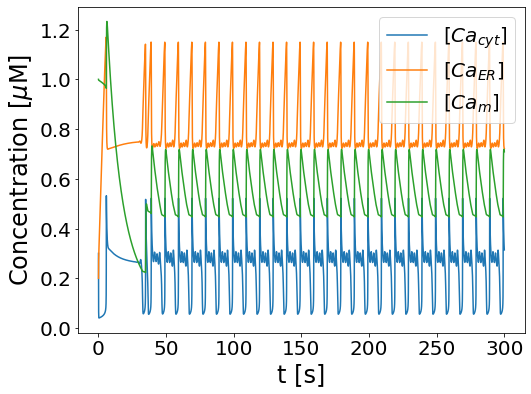

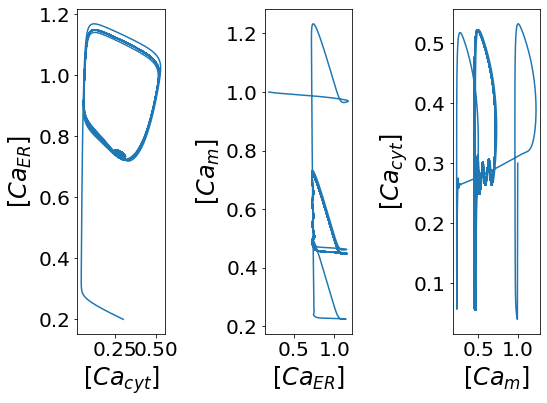

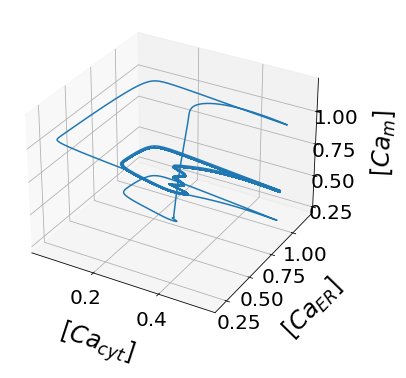

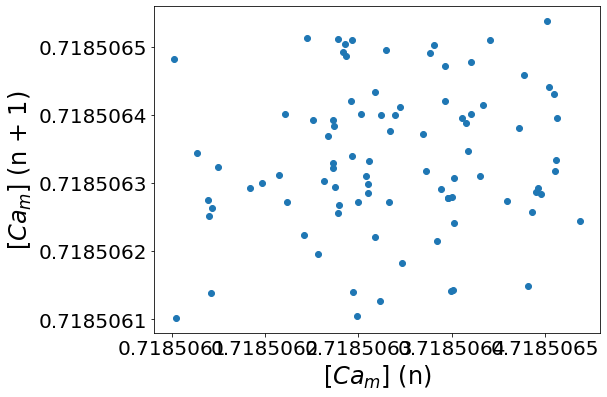

In [7]:
main_question_1(3900)

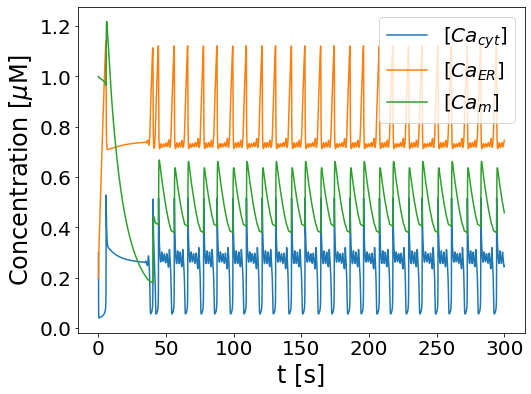

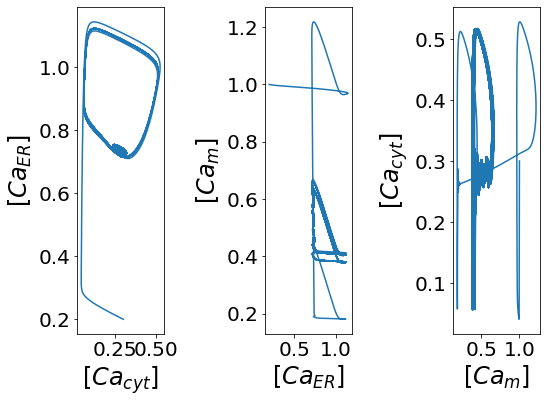

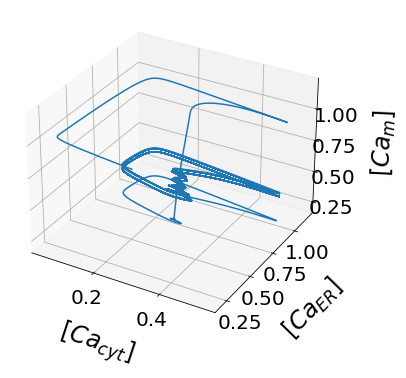

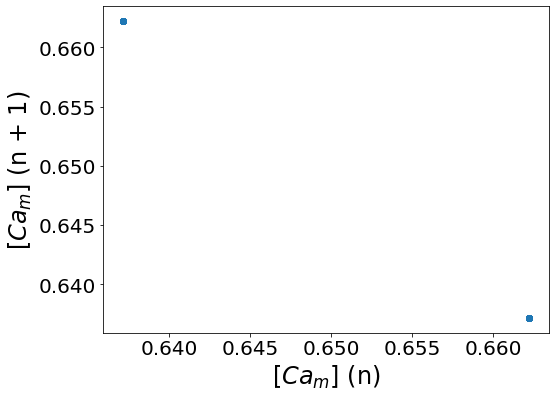

In [8]:
main_question_1(4000)

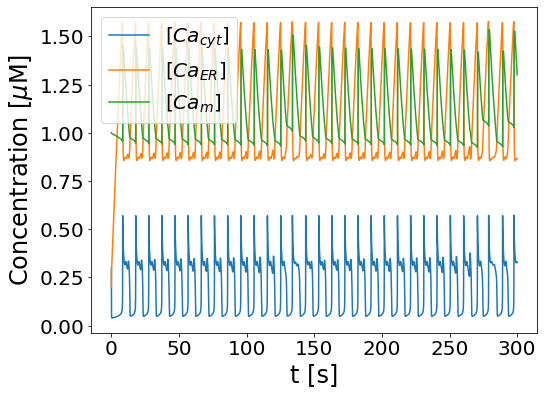

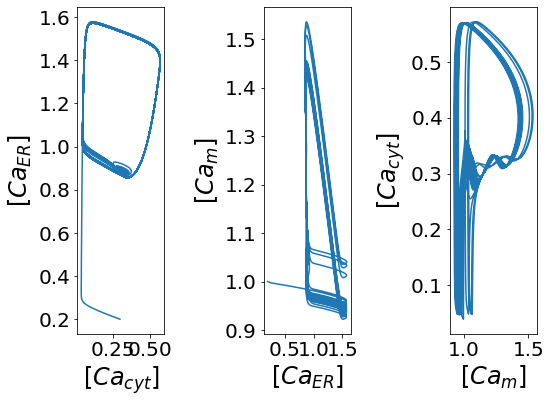

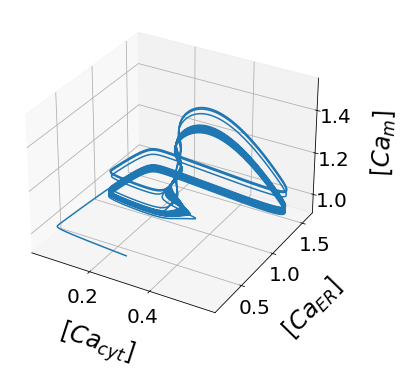

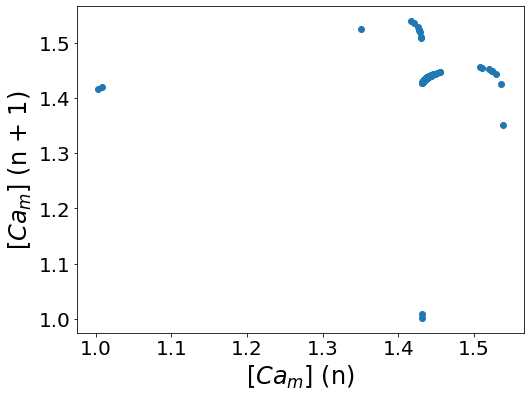

In [9]:
main_question_1(2830)

Question 2: Schnakenberg model

In [3]:
#Laplace 1D

def laplace_1D(X, dx):
    # the discretised approximation of the 1D Laplace operator using periodic boundaries
    return (np.roll(X, 1) + np.roll(X, -1) - 2*X)/dx**2

In [4]:
#Laplace 2D

def laplace_2D(X, dx):
    # the discretised approximation of the 2D Laplace operator using periodic boundaries
    return (np.roll(X, 1, axis=0) + np.roll(X, -1, axis=0) + np.roll(X, 1, axis=1) + np.roll(X, -1, axis=1) - 4*X)/(dx**2)

In [5]:
class Schnakenberg_1D:
    def __init__(self, c1=0.1, cm1=1, c2=0.9, c3=1, Du=0.0004, Dv=0.016, L=1, N=100, tmax=35, dt=0.001):
        self.c1, self.cm1, self.c2, self.c3, self.Du, self.Dv, self.L, self.N, self.tmax, self.dt = c1, cm1, c2, c3, Du, Dv, L, N, tmax, dt
        
        self.dx = L/N
        
        # initialize all points to zero, then implement the initial conditions at i=5
        self.u = [np.zeros(N)]
        self.v = [np.zeros(N)]
        self.u[0][5] = 1
        self.v[0][5] = 3
        
    def solve(self):
        # add the new calculation of the concentrations to the list to be plotted
        for t in np.arange(0, self.tmax, self.dt):
            self.u.append(self.u[-1] + self.dt * (self.Du * laplace_1D(self.u[-1], self.dx) + self.c1 - self.cm1 * self.u[-1] + self.c3*np.square(self.u[-1])*self.v[-1]))
            self.v.append(self.v[-1] + self.dt * (self.Dv * laplace_1D(self.v[-1], self.dx) + self.c2 - self.c3*np.square(self.u[-2])*self.v[-1]))
            print(t, end='\r')
        
    def time_development(self):
        # solve the concentrations up until the given t_max, and plot them in separate figures
        self.solve()
        
        plt.figure(dpi=100)
        plt.imshow(self.u[::-1], aspect = 2000*self.dt/self.tmax, cmap='jet', extent=(0, self.L, 0, self.tmax))
        plt.xlabel("x")
        plt.ylabel("t")
        plt.title("u")
        plt.colorbar()
        plt.tight_layout()
        plt.show()
        
        plt.figure(dpi=100)
        plt.imshow(self.v[::-1], aspect = 2000*self.dt/self.tmax, cmap='jet', extent=(0, self.L, 0, self.tmax))
        plt.xlabel("x")
        plt.ylabel("t")
        plt.title("v")
        plt.colorbar()
        plt.tight_layout()
        plt.show()

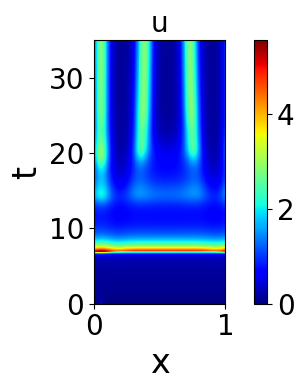

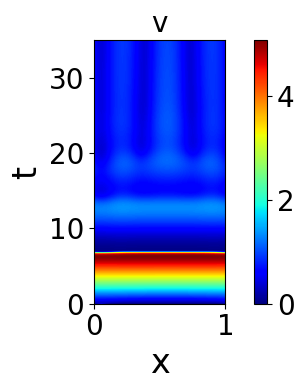

In [6]:
%matplotlib inline

Schnakenberg_1D().time_development()

In [9]:
from matplotlib.colors import Normalize
import copy
import matplotlib as mpl 

class Schnakenberg_2D:
    def __init__(self, c1=0.1, cm1=1, c2=0.9, c3=1, Du=0.0004, Dv=0.016, L=1, N=100, tmax=35, dt=0.001):
        self.c1, self.cm1, self.c2, self.c3, self.Du, self.Dv, self.L, self.N, self.tmax, self.dt = c1, cm1, c2, c3, Du, Dv, L, N, tmax, dt
        
        self.dx = L/N
        
        # initialize the grid points to random perturbations around 1 and 3
        self.u = np.random.normal(1, 0.01, (N, N))
        self.v = np.random.normal(3, 0.01, (N, N))
        self.t = 0
        
    def solve(self):
        # update the concentrations, save the old u as its needed to calculate the new v after u is updated
        old_u = copy.deepcopy(self.u)
        self.u = self.u + self.dt * (self.Du * laplace_2D(self.u, self.dx) + self.c1 - self.cm1 * self.u + self.c3*np.square(self.u)*self.v)
        self.v = self.v + self.dt * (self.Dv * laplace_2D(self.v, self.dx) + self.c2 - self.c3*np.square(self.u)*self.v)
        self.t += self.dt
    
    def plot_uv(self, cmap='jet'):
        # plot the current concentrations of u and v on the grid
        print(self.t)
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, dpi=100)
        self.im_u = ax1.imshow(self.u, cmap=cmap, norm=Normalize(0, 5), origin='lower', extent=(0, round(self.dx*self.N,8), 0, round(self.dx*self.N,8)), animated=True)
        self.im_v = ax2.imshow(self.v, cmap=cmap, norm=Normalize(0, 4), origin='lower', extent=(0, round(self.dx*self.N,8), 0, round(self.dx*self.N,8)), animated=True)
        ax1.set_title("u", fontsize=20)
        ax2.set_title("v", fontsize=20)
        ax1.set_xlabel("x")
        ax1.set_ylabel("y")
        ax2.set_xlabel("x")
        fig.colorbar(self.im_u, ax=ax1, fraction=0.046, pad=0.04)
        fig.colorbar(self.im_v, ax=ax2, fraction=0.046, pad=0.04)
        plt.show()
        
    def plot_over_time(self, plot_interval=1):
        # plot the concentrations from t=0 to t=tmax at given intervals in time
        while self.t < self.tmax:
            self.solve()
            if self.t % plot_interval <= self.dt:
                self.plot_uv()
                
            print(self.t, end='\r')

0.001


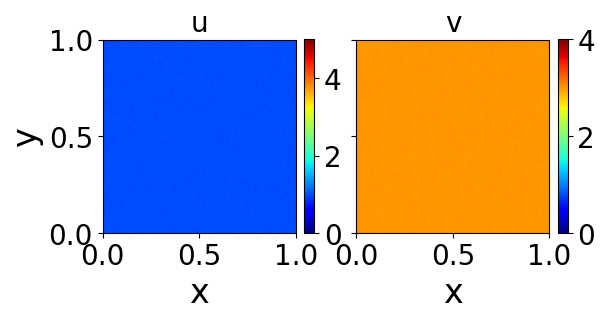

1.000000000000000776


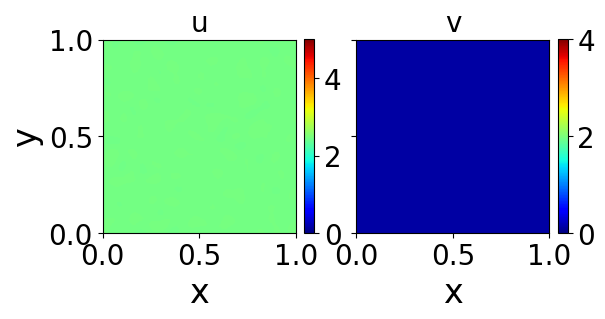

2.0009999999998906


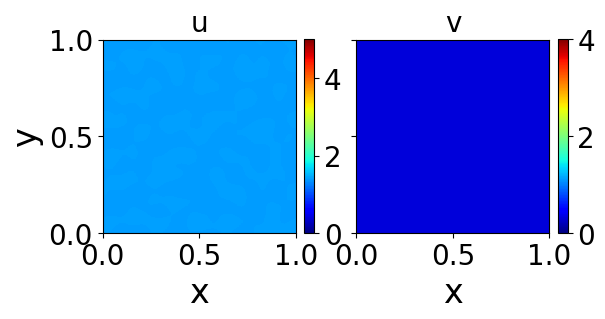

3.0009999999997805


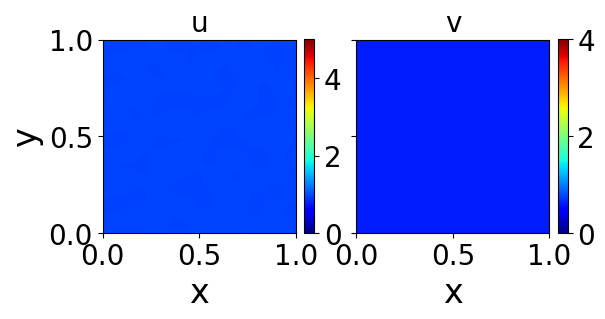

4.0009999999996715


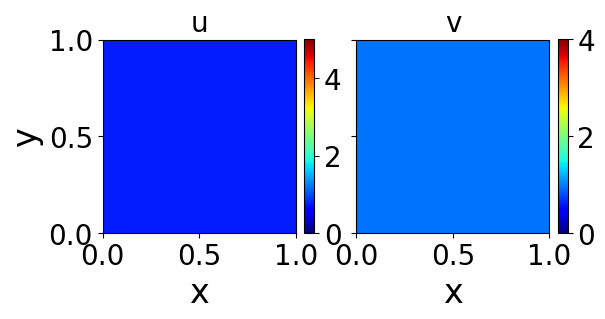

5.0000000000000046


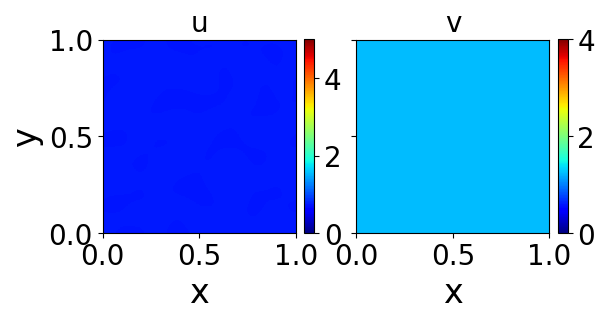

6.0000000000003386


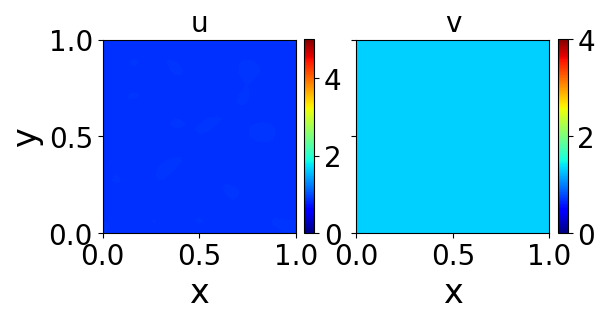

7.0000000000006726


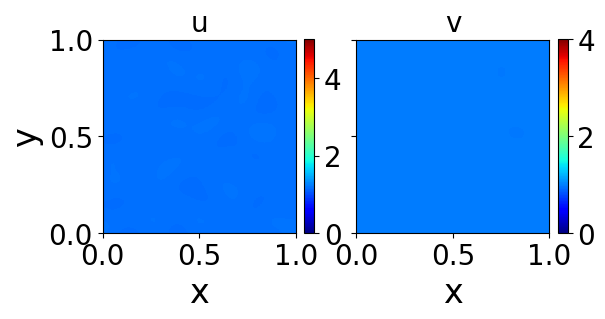

8.0000000000010056


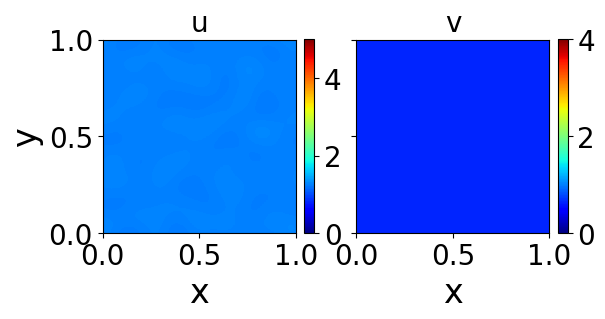

9.000000000000451


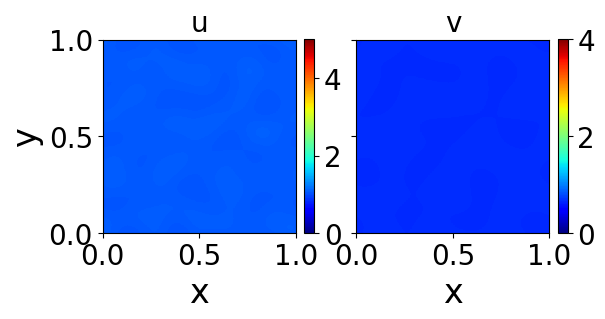

10.000999999999896


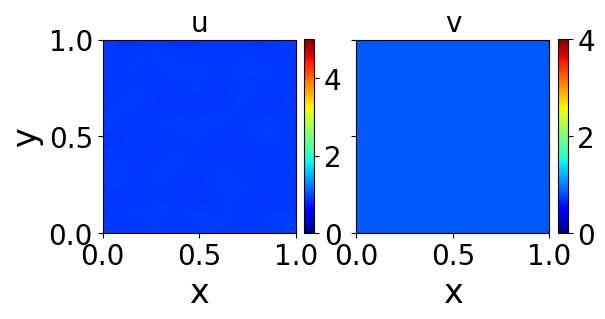

11.000999999999342


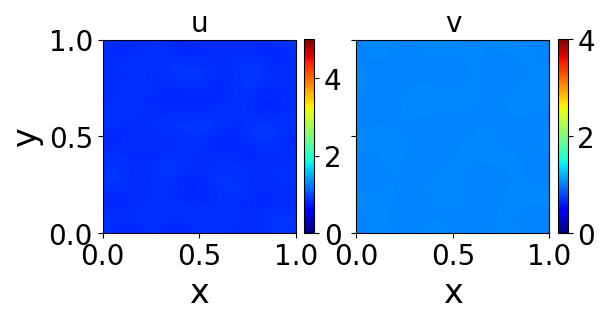

12.000999999998788


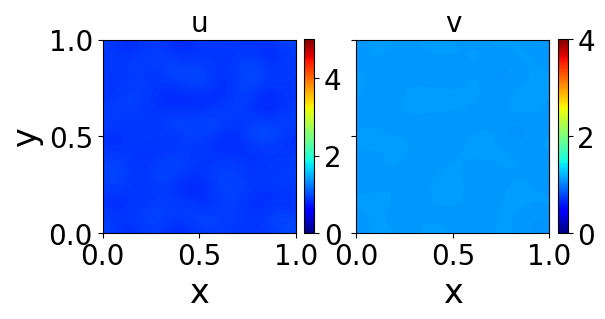

13.000999999998234


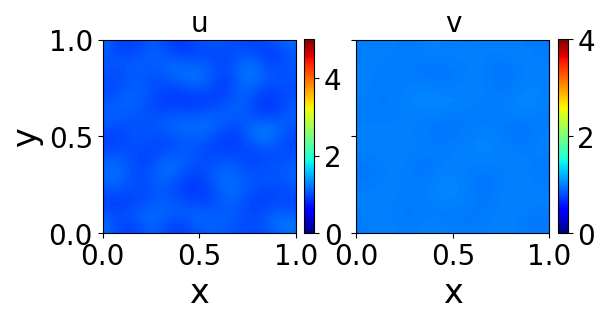

14.000999999997681


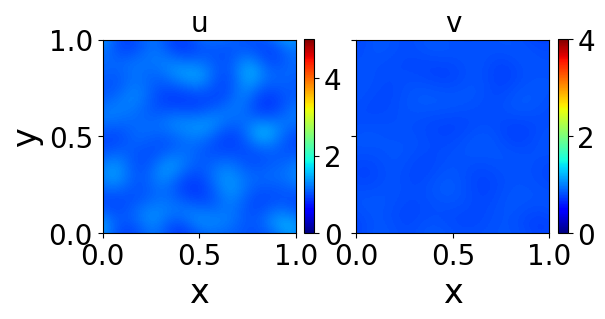

15.000999999997125


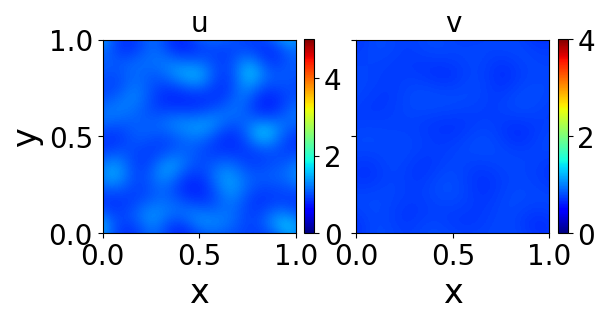

16.000999999996573


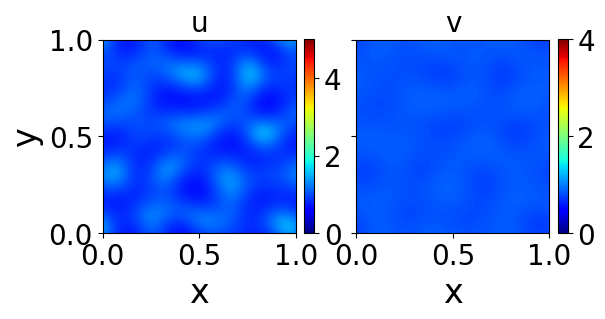

17.000999999997795


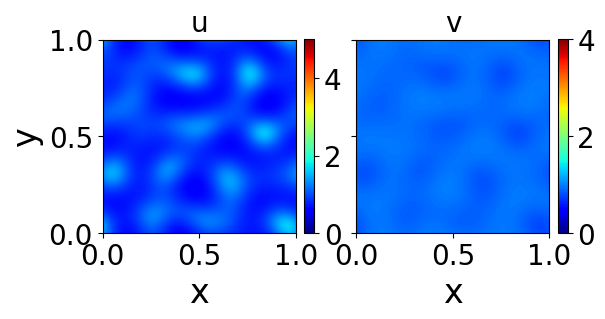

18.000999999999017


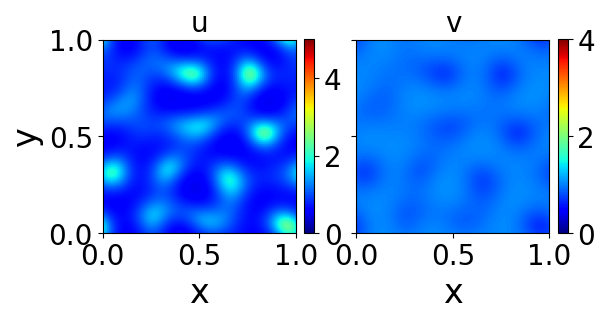

19.000000000000238


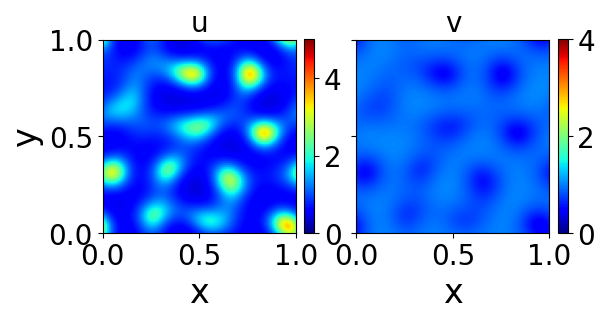

20.000000000001468


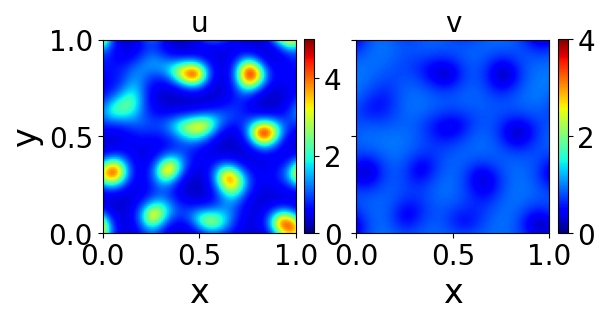

In [10]:
%matplotlib inline

Schnakenberg_2D(tmax=20).plot_over_time(1)